In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras import Model
from keras.applications.imagenet_utils import preprocess_input

import itertools
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

Using TensorFlow backend.


In [2]:
# specifying the path to our data:
train_path = "flower_photos/train"
valid_path = "flower_photos/valid"
test_path = "flower_photos/test"

In [3]:
# loading in the data in the specific batches:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=["daisy","dandelion","roses","sunflowers","tulips"],batch_size=36)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=["daisy","dandelion","roses","sunflowers","tulips"],batch_size=13)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=["daisy","dandelion","roses","sunflowers","tulips"],batch_size=10)

Found 3670 images belonging to 5 classes.
Found 1385 images belonging to 5 classes.
Found 125 images belonging to 5 classes.


In [4]:
# get base model
base_model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [7]:
# make a reference to VGG's input layer
inp = base_model.input

# make a new softmax layer with num of outputs
new_classification_layer = Dense(5, activation='sigmoid')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(base_model.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [8]:
model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
# make all layers untrainable by freezing weights (except for last layer)
for layer in model_new.layers[:-1]:
    layer.trainable = False

    # ensure the last layer is trainable/not frozen    
for layer in model_new.layers[-1:]:
    layer.trainable = True

In [10]:
# check to see it is correct:
for layer in model_new.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


In [11]:
model_new.compile(Adam(lr=.0001), loss="categorical_crossentropy", metrics=['accuracy'])
model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
# We train the model, in this case using a low size of epochs, since the model learns the data quite quickly
model_new.fit_generator(train_batches, steps_per_epoch=101,
                   validation_data=valid_batches, validation_steps=106, epochs=25, verbose=2)

Epoch 1/25
 - 34s - loss: 1.2038 - acc: 0.5415 - val_loss: 0.8610 - val_acc: 0.6851
Epoch 2/25
 - 28s - loss: 0.6333 - acc: 0.7744 - val_loss: 0.7334 - val_acc: 0.7223
Epoch 3/25
 - 28s - loss: 0.5146 - acc: 0.8189 - val_loss: 0.6727 - val_acc: 0.7420
Epoch 4/25
 - 28s - loss: 0.4457 - acc: 0.8357 - val_loss: 0.6429 - val_acc: 0.7507
Epoch 5/25
 - 28s - loss: 0.3861 - acc: 0.8641 - val_loss: 0.6865 - val_acc: 0.7442
Epoch 6/25
 - 28s - loss: 0.3537 - acc: 0.8797 - val_loss: 0.6138 - val_acc: 0.7690
Epoch 7/25
 - 28s - loss: 0.3183 - acc: 0.8836 - val_loss: 0.5863 - val_acc: 0.7741
Epoch 8/25
 - 28s - loss: 0.2950 - acc: 0.8974 - val_loss: 0.6144 - val_acc: 0.7726
Epoch 9/25
 - 28s - loss: 0.2655 - acc: 0.9097 - val_loss: 0.5883 - val_acc: 0.7857
Epoch 10/25
 - 28s - loss: 0.2458 - acc: 0.9183 - val_loss: 0.5590 - val_acc: 0.7894
Epoch 11/25
 - 28s - loss: 0.2301 - acc: 0.9230 - val_loss: 0.5332 - val_acc: 0.8039
Epoch 12/25
 - 28s - loss: 0.2057 - acc: 0.9383 - val_loss: 0.5616 - val_a

In [13]:
# We give it some more:
model_new.fit_generator(train_batches, steps_per_epoch=101,
                   validation_data=valid_batches, validation_steps=106, epochs=5, verbose=2)

Epoch 1/5
 - 28s - loss: 0.0920 - acc: 0.9860 - val_loss: 0.5103 - val_acc: 0.8200
Epoch 2/5
 - 28s - loss: 0.0886 - acc: 0.9892 - val_loss: 0.4872 - val_acc: 0.8309
Epoch 3/5
 - 28s - loss: 0.0840 - acc: 0.9904 - val_loss: 0.4887 - val_acc: 0.8287
Epoch 4/5
 - 28s - loss: 0.0777 - acc: 0.9912 - val_loss: 0.5047 - val_acc: 0.8265
Epoch 5/5
 - 28s - loss: 0.0759 - acc: 0.9917 - val_loss: 0.4846 - val_acc: 0.8309


In [13]:
train_batches.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [31]:
# Some lines to load an image for predictions:
import cv2
from keras.preprocessing import image

img_path="37940.jpg"
img = cv2.resize(cv2.imread(img_path), (224, 224)) # Specific for vgg16
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

We make predictions on the loaded image:

In [32]:
preds = model_new.predict(x) 

labels = np.argmax(preds, axis=-1)
for i in labels:
    if i == 4:
        out="tulips"
    elif i == 3:
        out="sunflowers"
    elif i == 2:
        out="roses"
    elif i == 1:
        out = "dandelion"
    elif i == 0:
        out = "daisy"
    print(out)

roses


We save the model for later use:

In [33]:
model_new.save("VGG16flowers.h5")

To use it later, we can load it in again:

In [2]:
from keras.models import load_model
model = load_model("VGG16flowers.h5")

And check the weights of the loaded model:

<h3> If the model doesnt learn the data properly, we can try changing the batch-size or the activation functions for the layers.
So e.g. changing the 'relu' to 'sigmoid'.

In [15]:
# Evaluating our model:
loss, accuracy = model_new.evaluate_generator(test_batches, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.0029644501442089677
Test accuracy: 1.0


The following is a similar to test the model, where the test image is show as well:

In [16]:
# helper function to load image and return it and input vector
from keras.preprocessing import image
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Probability: 0.15569999814033508 


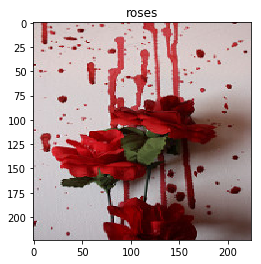

In [17]:
# Predicting images with our model:
img, x = get_image('flower_photos/test/roses/3412874275_ca78ee024d_m.jpg')
probabilities = model_new.predict([x])

if probabilities.argmax(-1) == 0:
    plt.title("daisy")
elif probabilities.argmax(-1) == 1:
    plt.title("dandelion")
elif probabilities.argmax(-1) == 2:
    plt.title("roses")
elif probabilities.argmax(-1) == 3:
    plt.title("sunflowers")
elif probabilities.argmax(-1) == 4:
    plt.title("tulips")
imshow(img)

print("Probability:", probabilities.max()*100,"")